In [448]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx


In [449]:
#helpers

def checkData(df):
    print("Shape:", df.shape)
    print("Has Null:", df.isnull().values.any())
    return df.head()

def dropPlayers(df):
    df = df[(df['MIN'] >= 12) & (df['GP'] >= 9)]
    return df

def corrHeatMap(df):
    plt.figure(figsize = (10,10))
    sns.heatmap(df.corr(),
                vmin = -1, vmax = 1, center = 0,
                cmap = sns.diverging_palette(20, 220, n = 500),
                square = True)

def highCorrGraph(df):
    # Create matrix of corrleations and select values only in the upper trinagle (excluding main diagnol)
    corrMatrix = df.corr().abs()
    upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))

    upper = corrMatrix

    # Find features with correlation greater than 0.8 both negative and positives are included
    highCorrCols = []

    for col in upper.columns:
        for i in range(0, len(upper[col])):
            if upper[col][i] > 0.8 and col != upper.index.values[i]:
                highCorrCols.append((col, upper.index.values[i]))
    
    # create and draw graph
    G = nx.Graph()
    G.add_edges_from(highCorrCols)

    plt.figure(figsize = (20,20))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 1000)
    nx.draw_networkx_edges(G, pos, width = 0.5, arrowsize=100)
    nx.draw_networkx_labels(G, pos, font_size = 10)

    plt.axis("off")
    plt.show()  

to_drop = set()


**General**
- basic
- advanced
- defense
- opponent
- scoring


In [450]:
basicData = pd.read_excel('./Data/General/BasicStats.xlsx')
checkData(basicData)

Shape: (540, 30)
Has Null: False


,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,0,Stephen Curry,GSW,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9
1,1,Bradley Beal,WAS,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1
2,2,Damian Lillard,POR,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0
3,3,Joel Embiid,PHI,27,51,39,12,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31,0,7.9
4,4,Giannis Antetokounmpo,MIL,26,61,40,21,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41,7,6.7


In [451]:
basicData.drop("Unnamed: 0", axis=1, inplace=True)
basicData = dropPlayers(basicData)
basicData = basicData.rename(columns={'PLAYER': 'Player'})

checkData(basicData)

Shape: (397, 29)
Has Null: False


,Player,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Stephen Curry,GSW,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9
1,Bradley Beal,WAS,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1
2,Damian Lillard,POR,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0
3,Joel Embiid,PHI,27,51,39,12,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31,0,7.9
4,Giannis Antetokounmpo,MIL,26,61,40,21,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41,7,6.7


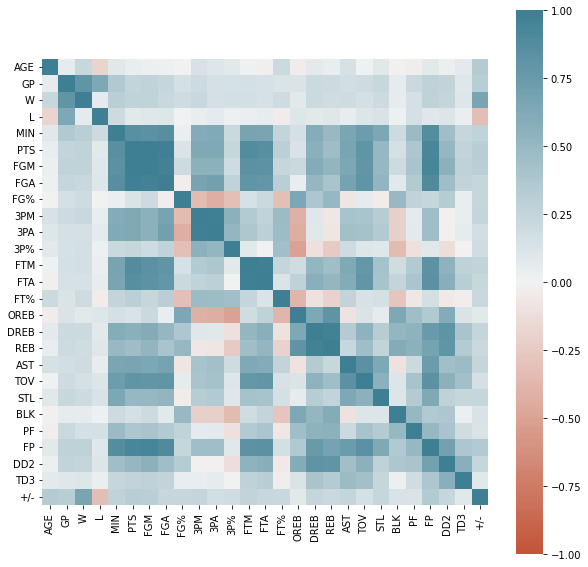

In [452]:
corrHeatMap(basicData)

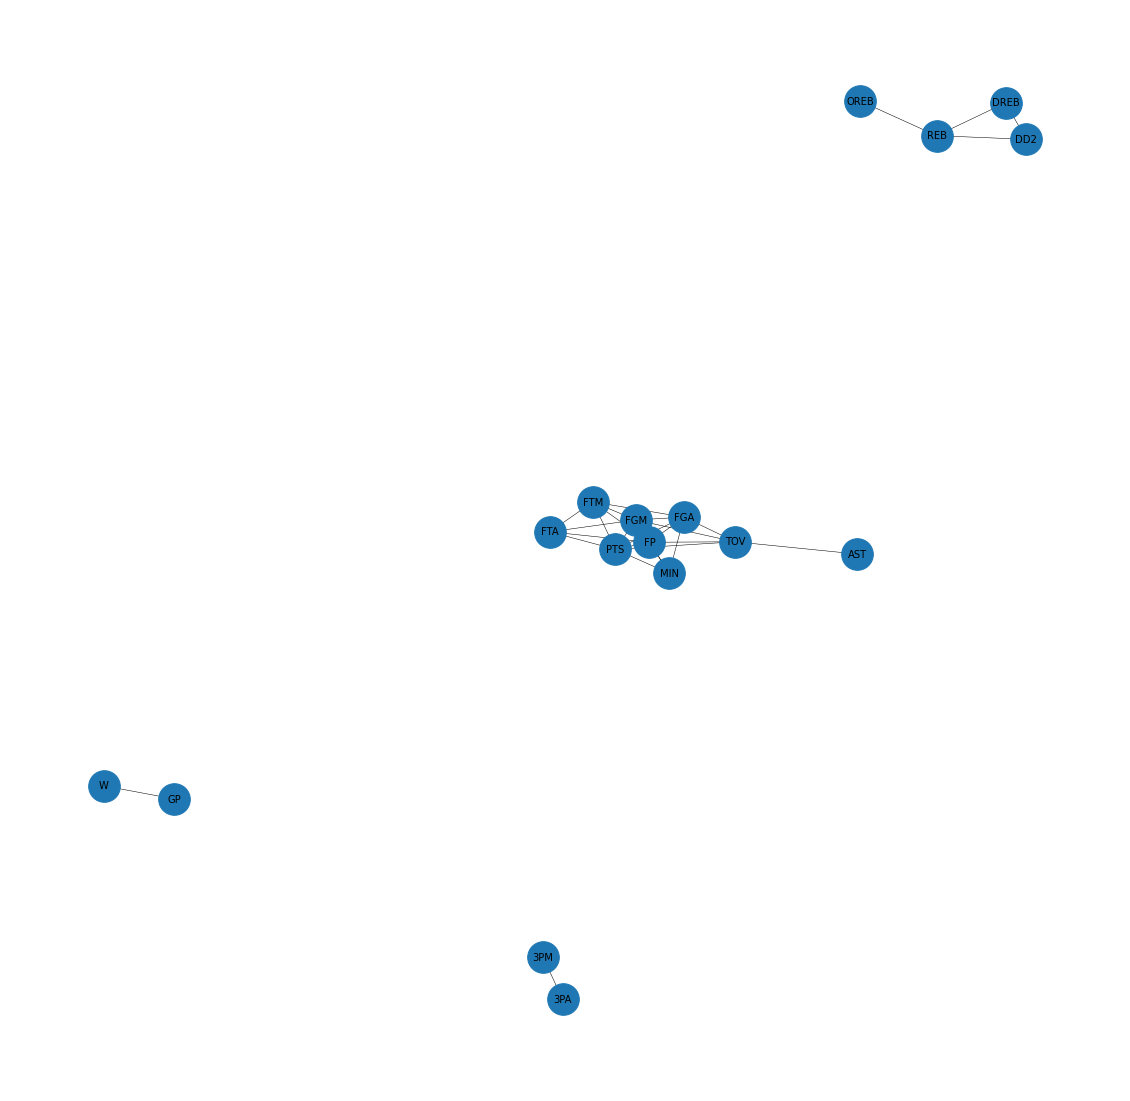

In [453]:
highCorrGraph(basicData)

<!-- - **GP**: Opponent Fast Break Points
- **W**: Opponent Points Off Turnovers
- **L**: Opponent 2nd Chance Points
- **MIN**: Opponent Points in Paint
- **PTS**: Minutes
- **FGM**: The percentage of team's defensive rebounds that a player has while on court
- **FGA%**: The percentage of available defensive rebounds a player or team obtains while on the floor
- **%FG%**: Percent of Team's Blocks
- **BLK**: Number of Blocks -->

- **GP** Games Played 
- **W** Wins 
- **L** Losses 
- **MIN** Minutes Played 
- **FGM** Field Goals Made 
- **FGA** Field Goals Attempted 
- **FG%** Field Goal Percentage 
- **3PM** 3 Point Field Goals Made 
- **3PA** 3 Point Field Goals Attempted 
- **3P%** 3 Point Field Goals Percentage 
- **FTM** Free Throws Made 
- **FTA** Free Throws Attempted 
- **FT%** Free Throw Percentage 
- **PTS** Points
- **ORE** Offensive Rebounds 
- **DRE** Defensive Rebounds 
- **REB** Rebounds 
- **AST** Assists 
- **TOV** Turnovers 
- **STL** Steals 
- **BLK** Blocks 
- **PF** Personal Fouls 
- **FP** Fantasy Points 
- **DD2** Double doubles 
- **TD3** Triple doubles  
- **+/-** Plus Minus

In [454]:
to_drop.update(['GP','FP','FTA','REB','TOV'])
checkData(basicData)

Shape: (397, 29)
Has Null: False


,Player,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Stephen Curry,GSW,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9
1,Bradley Beal,WAS,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1
2,Damian Lillard,POR,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0
3,Joel Embiid,PHI,27,51,39,12,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31,0,7.9
4,Giannis Antetokounmpo,MIL,26,61,40,21,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41,7,6.7


**Dropped Columns**
- GP
- FP
- FTA
- REB
- TOV

In [455]:
advancedData = pd.read_excel('./Data/General/AdvancedStats.xlsx')
checkData(advancedData)

Shape: (540, 24)
Has Null: False


,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,POSS
0,0,Anthony Edwards,MIN,19,72,23,49,32.1,110.6,115.6,-5.0,14.2,1.32,12.4,2.3,12.1,7.0,9.4,48.8,52.3,26.4,102.71,9.4,"4,961"
1,1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,116.8,107.3,9.5,9.1,1.06,10.4,1.8,9.9,6.0,9.8,53.6,58.8,22.5,99.94,9.4,"4,604"
2,2,Duncan Robinson,MIA,27,72,40,32,31.4,110.6,108.3,2.3,8.2,1.57,13.4,0.3,10.9,5.7,8.5,61.4,62.8,16.2,97.55,7.5,"4,602"
3,3,Dwayne Bacon,ORL,25,72,21,51,25.7,101.3,112.8,-11.4,8.0,2.02,9.9,1.5,10.2,5.6,4.9,44.3,49.0,19.3,100.39,6.9,"3,875"
4,4,Enes Freedom,POR,29,72,42,30,24.4,119.7,114.8,4.9,6.9,1.08,10.6,14.8,28.1,21.3,9.8,60.5,63.6,16.9,98.79,14.1,"3,607"


In [456]:
advancedData.drop("Unnamed: 0", axis=1, inplace=True)
advancedData = dropPlayers(advancedData)
advancedData = advancedData.rename(columns={'PLAYER': 'Player'})

checkData(advancedData)

Shape: (397, 23)
Has Null: False


,Player,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,POSS
0,Anthony Edwards,MIN,19,72,23,49,32.1,110.6,115.6,-5.0,14.2,1.32,12.4,2.3,12.1,7.0,9.4,48.8,52.3,26.4,102.71,9.4,"4,961"
1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,116.8,107.3,9.5,9.1,1.06,10.4,1.8,9.9,6.0,9.8,53.6,58.8,22.5,99.94,9.4,"4,604"
2,Duncan Robinson,MIA,27,72,40,32,31.4,110.6,108.3,2.3,8.2,1.57,13.4,0.3,10.9,5.7,8.5,61.4,62.8,16.2,97.55,7.5,"4,602"
3,Dwayne Bacon,ORL,25,72,21,51,25.7,101.3,112.8,-11.4,8.0,2.02,9.9,1.5,10.2,5.6,4.9,44.3,49.0,19.3,100.39,6.9,"3,875"
4,Enes Freedom,POR,29,72,42,30,24.4,119.7,114.8,4.9,6.9,1.08,10.6,14.8,28.1,21.3,9.8,60.5,63.6,16.9,98.79,14.1,"3,607"


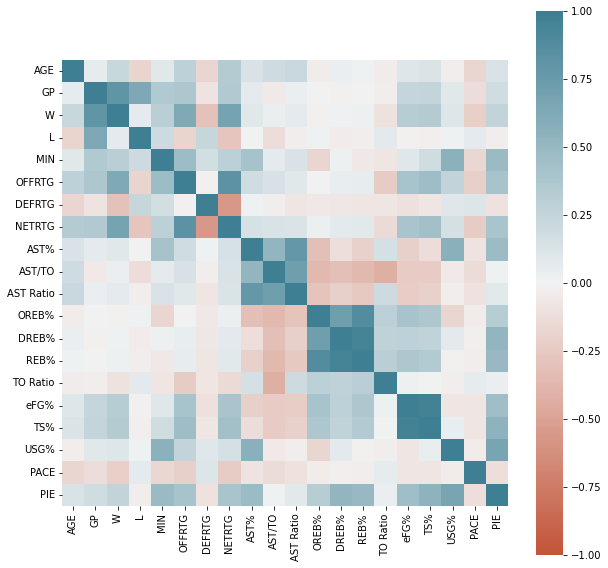

In [457]:
corrHeatMap(advancedData)

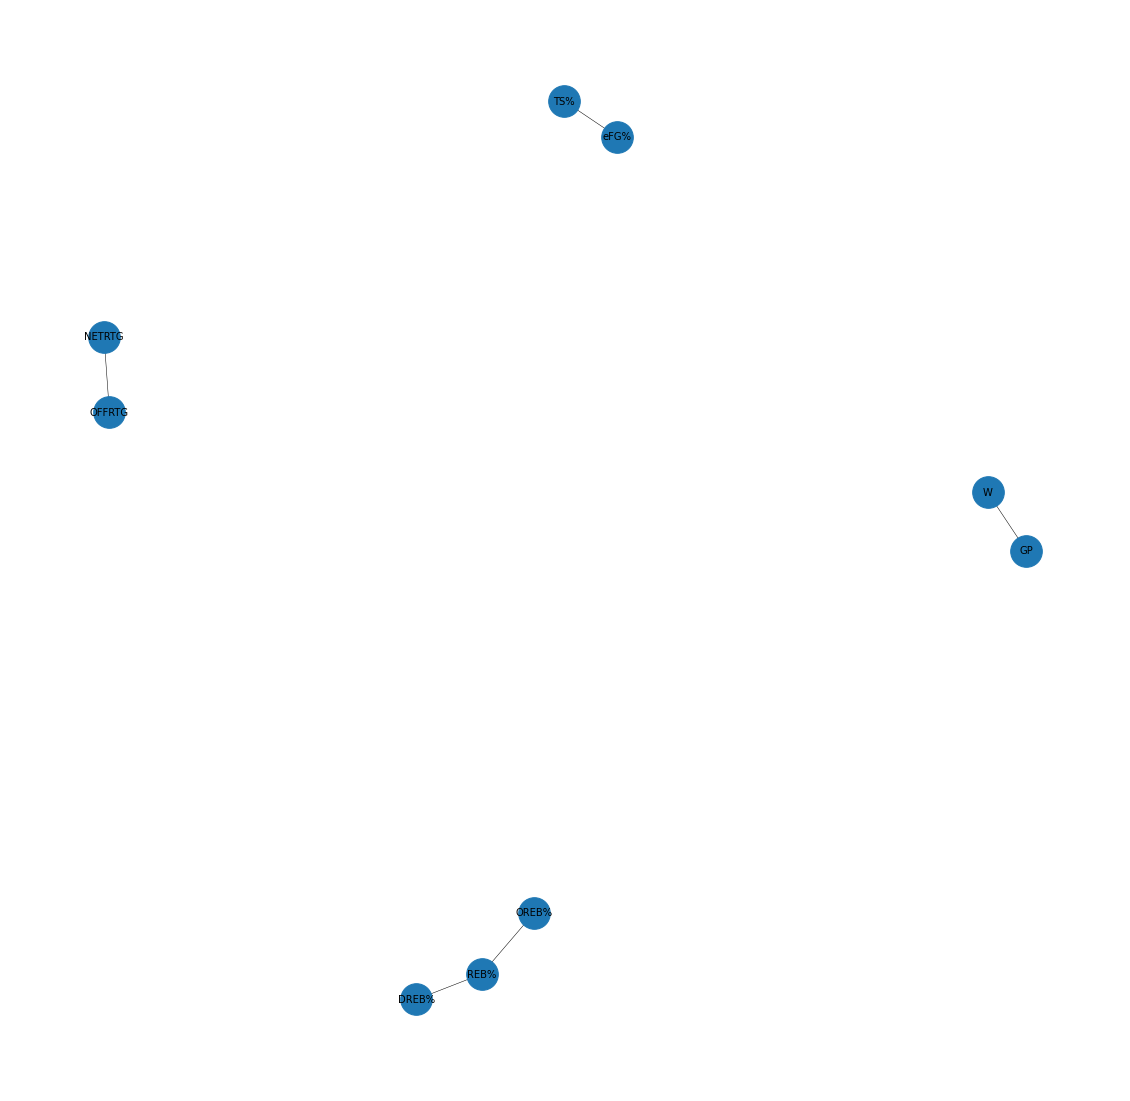

In [458]:
highCorrGraph(advancedData)

In [459]:
to_drop.update(['REB%','GP',"OFFRTG"])
checkData(advancedData)

Shape: (397, 23)
Has Null: False


,Player,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,POSS
0,Anthony Edwards,MIN,19,72,23,49,32.1,110.6,115.6,-5.0,14.2,1.32,12.4,2.3,12.1,7.0,9.4,48.8,52.3,26.4,102.71,9.4,"4,961"
1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,116.8,107.3,9.5,9.1,1.06,10.4,1.8,9.9,6.0,9.8,53.6,58.8,22.5,99.94,9.4,"4,604"
2,Duncan Robinson,MIA,27,72,40,32,31.4,110.6,108.3,2.3,8.2,1.57,13.4,0.3,10.9,5.7,8.5,61.4,62.8,16.2,97.55,7.5,"4,602"
3,Dwayne Bacon,ORL,25,72,21,51,25.7,101.3,112.8,-11.4,8.0,2.02,9.9,1.5,10.2,5.6,4.9,44.3,49.0,19.3,100.39,6.9,"3,875"
4,Enes Freedom,POR,29,72,42,30,24.4,119.7,114.8,4.9,6.9,1.08,10.6,14.8,28.1,21.3,9.8,60.5,63.6,16.9,98.79,14.1,"3,607"


**Dropped Columns**
- REB%
- GP
- OFFRTG

In [460]:
opponentData = pd.read_excel('./Data/General/opponentStats.xlsx')
opponentData.drop("Unnamed: 0", axis=1, inplace=True)
opponentData = dropPlayers(opponentData)

checkData(opponentData)

Shape: (441, 27)
Has Null: False


,Player,Team,GP,W,L,MIN,OppFGM,OppFGA,OppFG%,Opp3PM,Opp3PA,Opp3P%,OppFTM,OppFTA,OppFT%,OppOREB,OppDREB,OppREB,OppAST,OppTOV,OppSTL,OppBLK,OppBLKA,OppPF,OppPFD,OppPTS,+/-
0,"Bacon, Dwayne",ORL,72,21,51,25.7,22.8,48.2,47.4,7.2,19.7,36.2,7.9,10.1,78.1,5.1,20.6,25.7,14.3,6.5,3.8,2.8,2.2,9.5,9.1,60.7,6.2
1,"Bogdanovic, Bojan",UTA,72,52,20,30.8,26.9,59.4,45.3,6.6,19.5,34.1,8.4,11.2,74.9,6.6,20.8,27.4,14.5,6.9,4.9,2.6,3.4,12.4,11.1,68.9,-5.8
2,"Bridges, Mikal",PHX,72,51,21,32.6,27.3,58.7,46.5,7.9,22.1,35.6,11.1,14.3,78.1,6.8,21.7,28.5,15.5,9.4,4.8,2.2,3.1,11.8,12.7,73.6,-4.7
3,"Edwards, Anthony",MIN,72,23,49,32.1,29.2,59.3,49.2,8.9,22.6,39.4,12.1,15.3,79.1,6.7,23.7,30.4,18.4,10.2,5.1,3.5,3.4,13.0,13.7,79.3,3.2
4,"Freedom, Enes",POR,72,42,30,24.4,21.9,45.8,47.7,6.5,17.4,37.1,7.6,9.9,77.0,5.3,17.1,22.4,13.3,5.6,2.8,2.5,2.4,9.6,8.3,57.8,-2.2


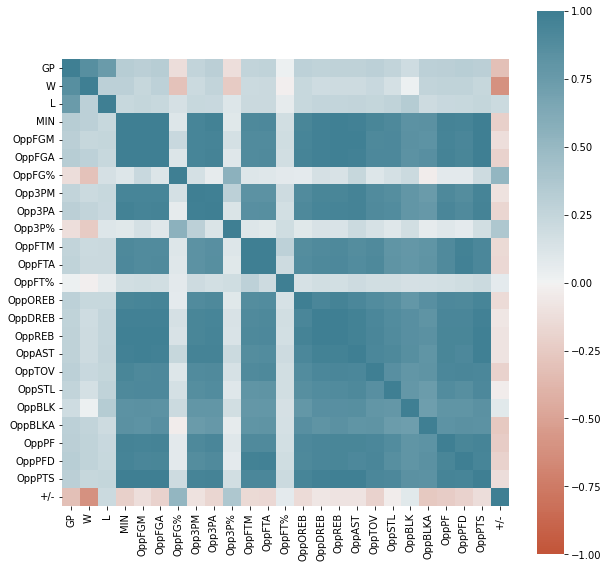

In [461]:
corrHeatMap(opponentData)

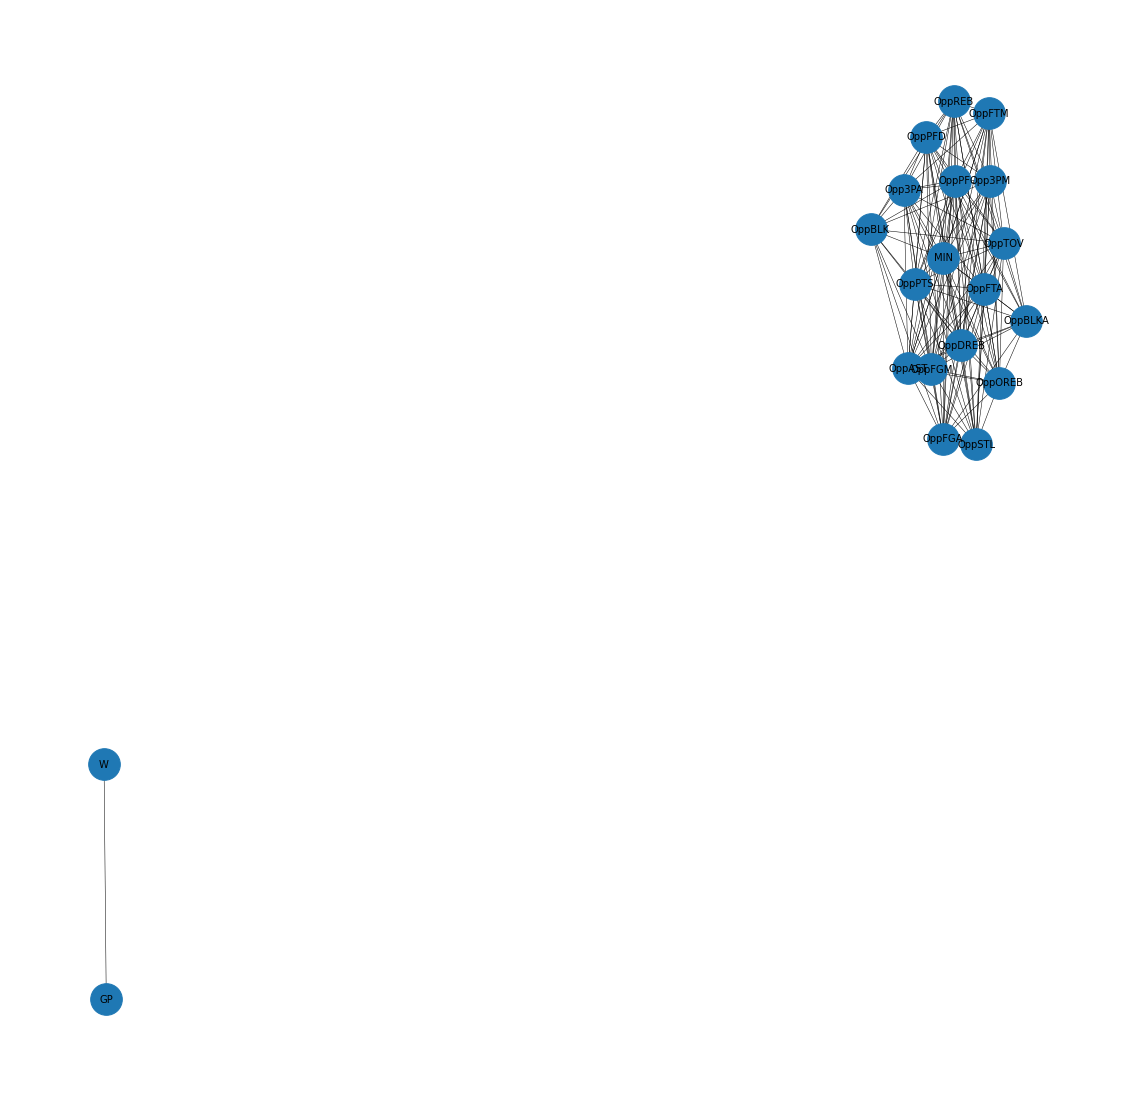

In [462]:
highCorrGraph(opponentData)

In [463]:
to_drop.update(['OppREB','OppBLK','OppFTA','OppFTM','Opp3PM','Opp3PA','OppFGM','OppFGA'])

In [464]:
defenseData = pd.read_excel('./Data/General/defenseStats.xlsx')
checkData(defenseData)

Shape: (540, 21)
Has Null: False


,Unnamed: 0,Player,TEAM,AGE,GP,W,L,MIN,DEF RTG,DREB,DREB%,%DREB,STL,STL%,BLK,%BLK,OPP PTSOFF TOV,OPP PTS2ND CHANCE,OPP PTSFB,OPP PTSPAINT,DEFWS
0,0,Anthony Edwards,MIN,19,72,23,49,32.1,115.6,3.8,12.1,17.8,1.1,19.5,0.5,14.6,11.3,9.8,10.4,34.1,0.048
1,1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,107.3,3.3,9.9,13.9,0.6,15.6,0.1,1.6,11.5,7.9,7.8,33.3,0.121
2,2,Duncan Robinson,MIA,27,72,40,32,31.4,108.3,3.4,10.9,15.6,0.6,11.7,0.3,11.0,10.6,7.8,6.7,26.8,0.113
3,3,Dwayne Bacon,ORL,25,72,21,51,25.7,112.8,2.7,10.2,14.2,0.6,16.9,0.1,3.1,8.0,5.9,7.6,26.2,0.060
4,4,Enes Freedom,POR,29,72,42,30,24.4,114.8,7.1,28.1,40.4,0.5,14.9,0.7,27.9,6.8,6.8,6.8,25.0,0.042


In [465]:
defenseData.drop("Unnamed: 0", axis=1, inplace=True)
defenseData = dropPlayers(defenseData)

checkData(defenseData)

Shape: (397, 20)
Has Null: False


,Player,TEAM,AGE,GP,W,L,MIN,DEF RTG,DREB,DREB%,%DREB,STL,STL%,BLK,%BLK,OPP PTSOFF TOV,OPP PTS2ND CHANCE,OPP PTSFB,OPP PTSPAINT,DEFWS
0,Anthony Edwards,MIN,19,72,23,49,32.1,115.6,3.8,12.1,17.8,1.1,19.5,0.5,14.6,11.3,9.8,10.4,34.1,0.048
1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,107.3,3.3,9.9,13.9,0.6,15.6,0.1,1.6,11.5,7.9,7.8,33.3,0.121
2,Duncan Robinson,MIA,27,72,40,32,31.4,108.3,3.4,10.9,15.6,0.6,11.7,0.3,11.0,10.6,7.8,6.7,26.8,0.113
3,Dwayne Bacon,ORL,25,72,21,51,25.7,112.8,2.7,10.2,14.2,0.6,16.9,0.1,3.1,8.0,5.9,7.6,26.2,0.060
4,Enes Freedom,POR,29,72,42,30,24.4,114.8,7.1,28.1,40.4,0.5,14.9,0.7,27.9,6.8,6.8,6.8,25.0,0.042


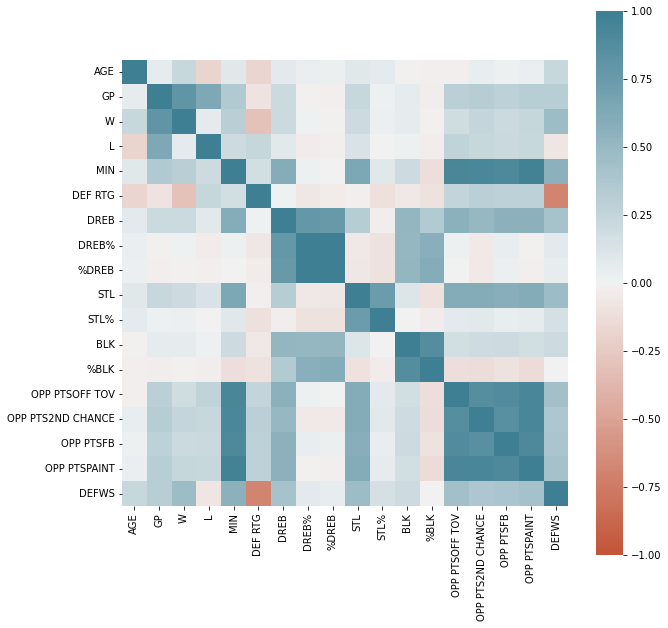

In [466]:
corrHeatMap(defenseData)

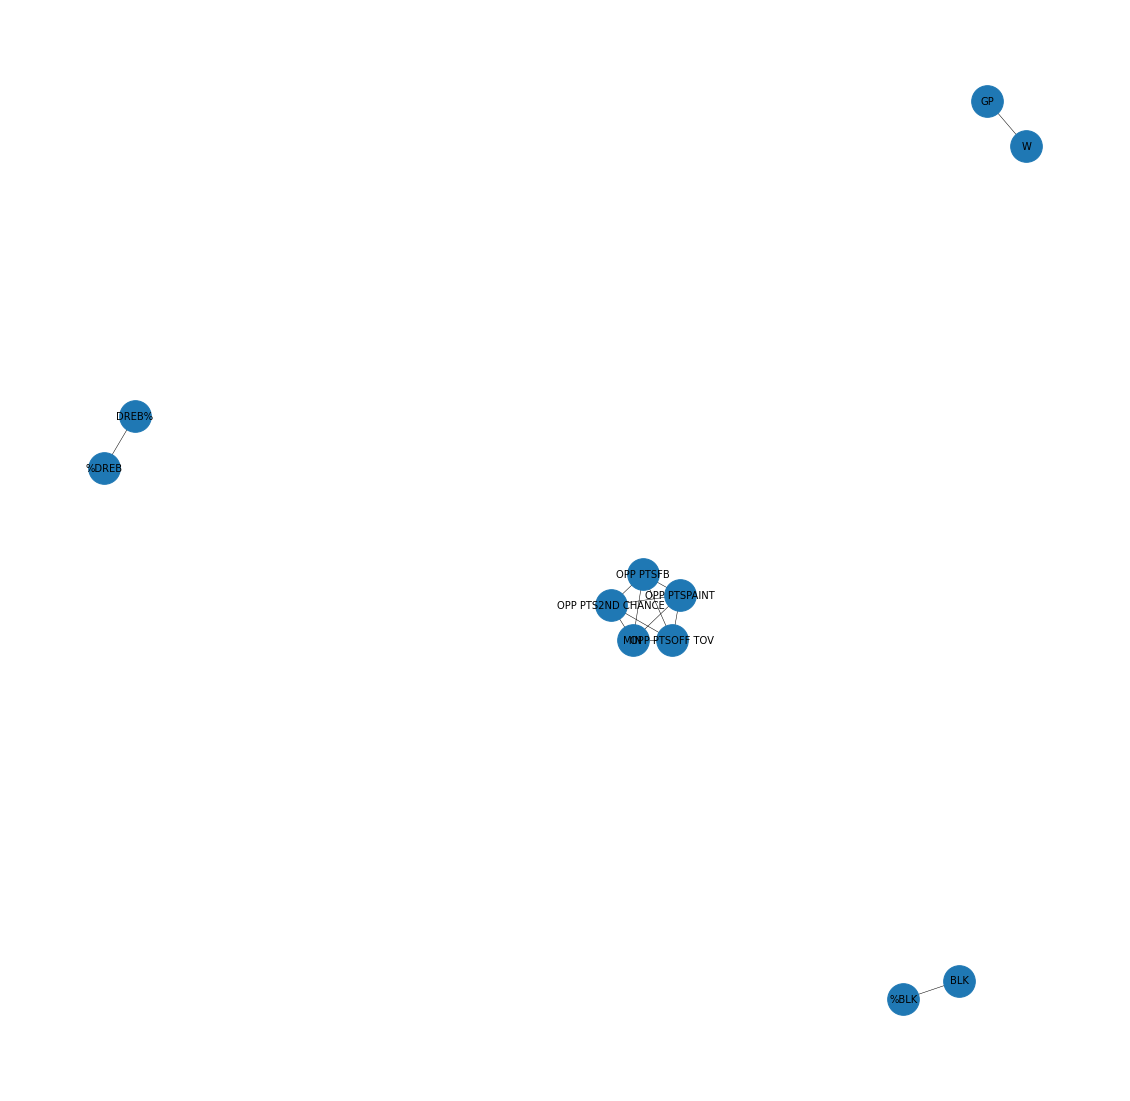

In [467]:
highCorrGraph(defenseData)

- **OPP PTSFB**: Opponent Fast Break Points
- **OPP PTSOFF TOV**: Opponent Points Off Turnovers
- **OPP PTS2ND CHANCE**: Opponent 2nd Chance Points
- **OPP PTSPAINT**: Opponent Points in Paint
- **MIN**: Minutes
- **%DREB**: The percentage of team's defensive rebounds that a player has while on court
- **DREB%**: The percentage of available defensive rebounds a player or team obtains while on the floor
- **%BLK**: Percent of Team's Blocks
- **BLK**: Number of Blocks

In [468]:
to_drop.update(['GP','BLK','DREB','MIN'])
checkData(defenseData)

Shape: (397, 20)
Has Null: False


,Player,TEAM,AGE,GP,W,L,MIN,DEF RTG,DREB,DREB%,%DREB,STL,STL%,BLK,%BLK,OPP PTSOFF TOV,OPP PTS2ND CHANCE,OPP PTSFB,OPP PTSPAINT,DEFWS
0,Anthony Edwards,MIN,19,72,23,49,32.1,115.6,3.8,12.1,17.8,1.1,19.5,0.5,14.6,11.3,9.8,10.4,34.1,0.048
1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,107.3,3.3,9.9,13.9,0.6,15.6,0.1,1.6,11.5,7.9,7.8,33.3,0.121
2,Duncan Robinson,MIA,27,72,40,32,31.4,108.3,3.4,10.9,15.6,0.6,11.7,0.3,11.0,10.6,7.8,6.7,26.8,0.113
3,Dwayne Bacon,ORL,25,72,21,51,25.7,112.8,2.7,10.2,14.2,0.6,16.9,0.1,3.1,8.0,5.9,7.6,26.2,0.060
4,Enes Freedom,POR,29,72,42,30,24.4,114.8,7.1,28.1,40.4,0.5,14.9,0.7,27.9,6.8,6.8,6.8,25.0,0.042


**Dropped Columns**
- GP
- BLK
- DREB
- MIN

In [469]:
scoringData = pd.read_excel('./Data/General/scoringStats.xlsx')
scoringData.drop("Unnamed: 0", axis=1, inplace=True)
scoringData = dropPlayers(scoringData)

checkData(scoringData)

Shape: (397, 22)
Has Null: False


,Player,TEAM,AGE,GP,W,L,MIN,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PT MR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST
0,Anthony Edwards,MIN,19,72,23,49,32.1,57.1,42.9,48.0,4.5,36.9,11.1,15.1,15.5,43.5,39.2,60.8,63.2,36.8,47.3,52.7
1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,50.2,49.8,36.9,3.4,44.1,13.5,19.0,13.6,33.5,41.2,58.8,96.1,3.9,65.5,34.5
2,Duncan Robinson,MIA,27,72,40,32,31.4,14.5,85.5,13.8,1.1,79.6,10.3,6.6,17.2,12.7,89.2,10.8,97.2,2.8,95.6,4.4
3,Dwayne Bacon,ORL,25,72,21,51,25.7,71.5,28.5,59.1,10.9,22.5,17.9,18.4,14.2,48.2,40.8,59.2,59.3,40.7,44.5,55.5
4,Enes Freedom,POR,29,72,42,30,24.4,99.3,0.7,83.9,0.2,0.4,4.0,15.7,10.7,83.6,45.9,54.1,100.0,0.0,46.0,54.0


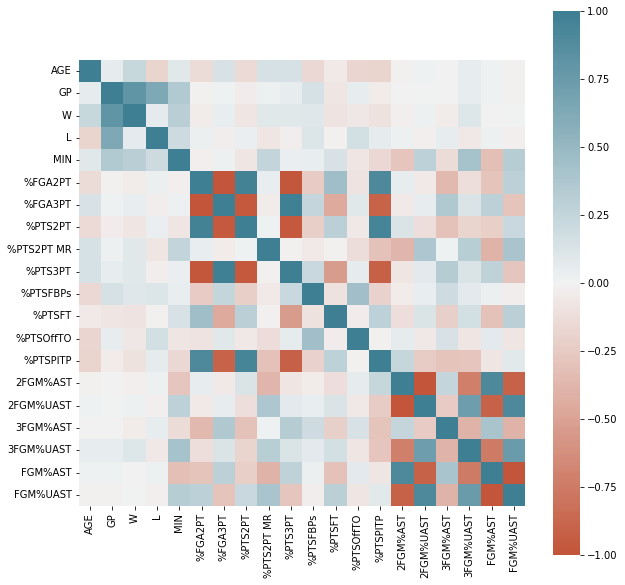

In [470]:
corrHeatMap(scoringData)

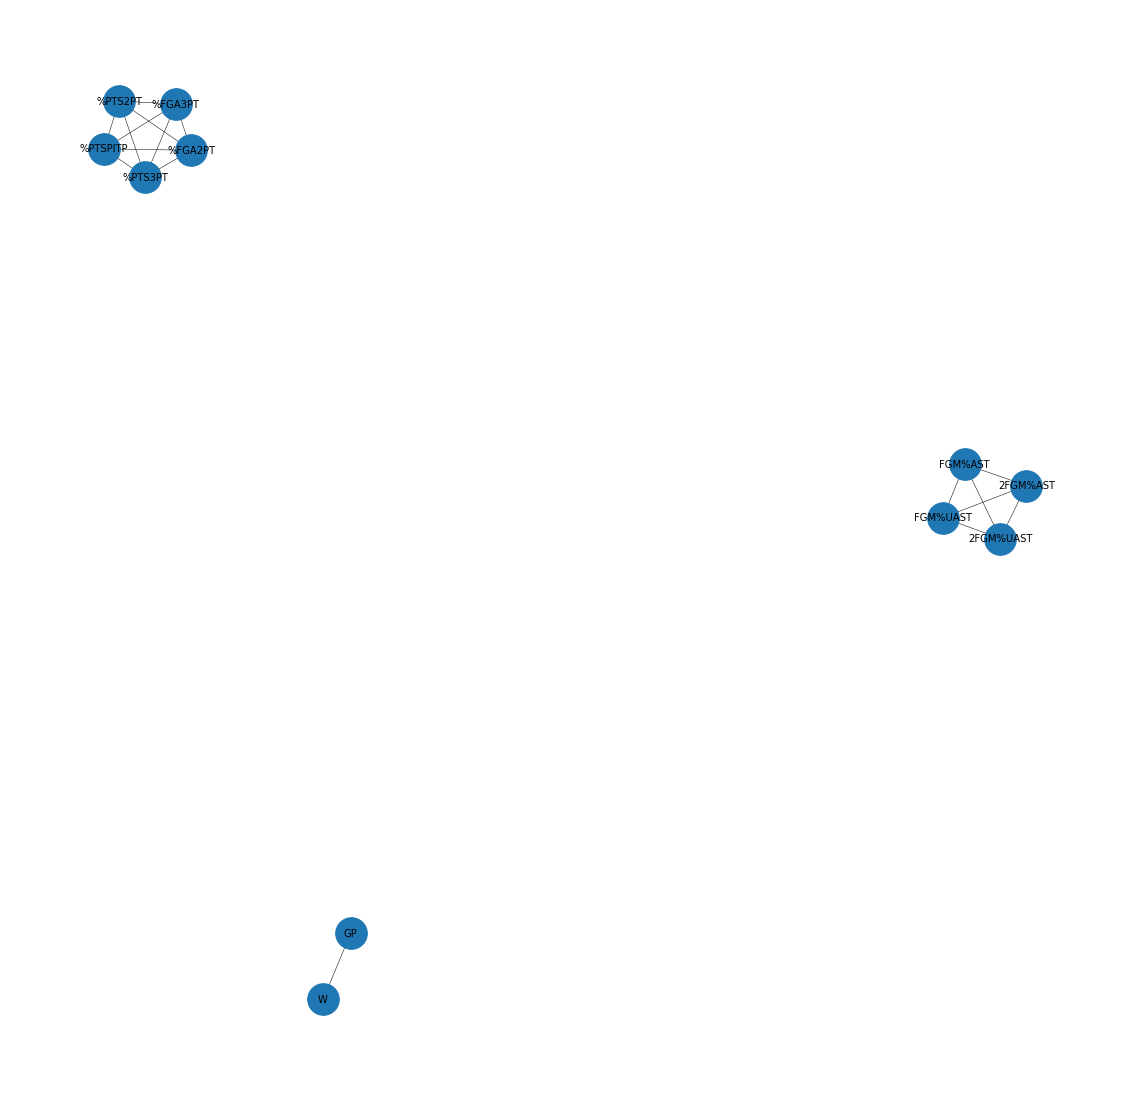

In [471]:
highCorrGraph(scoringData)

- **%PTS3PT**: Percent of 3 Pointers
- **%PTS2PT**: Percent of 2 Pointers
- **%FGA3PT**: Percent of Field Goals Attempted (3 PT)
- **%FGA2PT**: Percent of Field Goals Attempted (2 PT)
- **%PTSPITP**: Percent of of Points in the Paint

- **2FGM%UAST**: Percent of 2 PT Field Goals Unassisted
- **FGM%UAST**: Percent of PT Field Goals Unassisted
- **2FGM%AST**: Percent of 2 PT Field Goals Assisted
- **FGM%AST**: Percent of PT Field Goals Assisted

In [472]:
to_drop.update(['GP','MIN','%PTS3PT','%PTS2PT','FGM%AST','FGM%UAST'])
checkData(scoringData)

Shape: (397, 22)
Has Null: False


,Player,TEAM,AGE,GP,W,L,MIN,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PT MR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST
0,Anthony Edwards,MIN,19,72,23,49,32.1,57.1,42.9,48.0,4.5,36.9,11.1,15.1,15.5,43.5,39.2,60.8,63.2,36.8,47.3,52.7
1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,50.2,49.8,36.9,3.4,44.1,13.5,19.0,13.6,33.5,41.2,58.8,96.1,3.9,65.5,34.5
2,Duncan Robinson,MIA,27,72,40,32,31.4,14.5,85.5,13.8,1.1,79.6,10.3,6.6,17.2,12.7,89.2,10.8,97.2,2.8,95.6,4.4
3,Dwayne Bacon,ORL,25,72,21,51,25.7,71.5,28.5,59.1,10.9,22.5,17.9,18.4,14.2,48.2,40.8,59.2,59.3,40.7,44.5,55.5
4,Enes Freedom,POR,29,72,42,30,24.4,99.3,0.7,83.9,0.2,0.4,4.0,15.7,10.7,83.6,45.9,54.1,100.0,0.0,46.0,54.0


**Dropped Columns**
- GP
- L
- MIN
- %PTS3PT
- %PTS2PT
- FGM%AST
- FGM%UAST

In [473]:
to_drop

{'%PTS2PT',
 '%PTS3PT',
 'BLK',
 'DREB',
 'FGM%AST',
 'FGM%UAST',
 'FP',
 'FTA',
 'GP',
 'MIN',
 'OFFRTG',
 'Opp3PA',
 'Opp3PM',
 'OppBLK',
 'OppFGA',
 'OppFGM',
 'OppFTA',
 'OppFTM',
 'OppREB',
 'REB',
 'REB%',
 'TOV'}

In [474]:
general = [basicData,advancedData,defenseData,opponentData,scoringData]
generalData = pd.DataFrame()
generalData['Player'] = basicData['Player']
for x in general:
    generalData = generalData.merge(x,on="Player",how="outer",suffixes=("","_delme"))

generalData = generalData[[c for c in generalData.columns if not c.endswith('_delme')]]


In [475]:
checkData(generalData)

Shape: (838, 90)
Has Null: True


,Player,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,POSS,DEF RTG,%DREB,STL%,%BLK,OPP PTSOFF TOV,OPP PTS2ND CHANCE,OPP PTSFB,OPP PTSPAINT,DEFWS,Team,OppFGM,OppFGA,OppFG%,Opp3PM,Opp3PA,Opp3P%,OppFTM,OppFTA,OppFT%,OppOREB,OppDREB,OppREB,OppAST,OppTOV,OppSTL,OppBLK,OppBLKA,OppPF,OppPFD,OppPTS,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PT MR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST
0,Stephen Curry,GSW,33.0,63.0,37.0,26.0,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8.0,0.0,3.9,114.2,109.6,4.6,28.3,1.70,17.4,1.3,13.5,7.7,10.2,60.5,65.5,33.1,105.16,18.1,"4,725",109.6,19.9,20.9,3.8,13.0,10.2,10.1,32.5,0.112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.3,58.7,31.9,6.6,50.2,11.4,17.9,14.5,25.3,41.1,58.9,58.8,41.2,50.2,49.8
1,Bradley Beal,WAS,28.0,60.0,32.0,28.0,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4.0,0.0,-0.1,114.4,114.8,-0.4,20.2,1.42,13.2,3.3,9.4,6.4,9.3,53.2,59.3,33.1,105.21,14.5,"4,713",114.8,13.6,19.9,11.9,13.1,10.2,8.3,35.6,0.061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,27.0,57.5,16.8,20.8,7.1,21.7,13.5,40.7,43.0,57.0,72.3,27.7,48.7,51.3
2,Damian Lillard,POR,30.0,67.0,39.0,28.0,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16.0,0.0,3.0,119.6,115.6,4.0,33.4,2.49,22.5,1.2,10.4,5.7,9.0,55.4,62.3,30.6,100.40,15.8,"5,014",115.6,14.9,17.4,7.0,11.2,9.6,10.3,35.5,0.054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.2,52.8,33.9,7.5,42.8,8.4,23.3,12.0,26.5,17.7,82.3,39.3,60.7,27.6,72.4
3,Joel Embiid,PHI,27.0,51.0,39.0,12.0,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31.0,0.0,7.9,117.8,105.8,12.0,15.6,0.91,10.0,7.8,25.4,17.2,11.0,54.5,63.6,35.2,100.79,20.3,"3,331",105.8,36.0,16.3,37.1,10.5,7.5,9.0,29.1,0.135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.9,17.1,55.5,19.3,12.0,6.6,32.5,13.6,36.3,42.9,57.1,87.9,12.1,48.6,51.4
4,Giannis Antetokounmpo,MIL,26.0,61.0,40.0,21.0,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41.0,7.0,6.7,117.1,107.3,9.8,28.2,1.72,18.7,4.8,26.4,16.0,10.8,60.0,63.3,32.0,104.17,19.6,"4,359",107.3,35.7,21.8,34.6,10.7,8.1,7.0,29.1,0.130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.9,20.1,65.1,5.9,11.7,16.6,23.2,14.7,59.2,42.8,57.2,29.9,70.1,41.4,58.6


In [476]:
generalData.drop(list(to_drop), axis=1,inplace=True)

In [477]:
checkData(generalData)

Shape: (838, 68)
Has Null: True


,Player,TEAM,AGE,W,L,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FT%,OREB,AST,STL,PF,DD2,TD3,+/-,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,POSS,DEF RTG,%DREB,STL%,%BLK,OPP PTSOFF TOV,OPP PTS2ND CHANCE,OPP PTSFB,OPP PTSPAINT,DEFWS,Team,OppFG%,Opp3P%,OppFT%,OppOREB,OppDREB,OppAST,OppTOV,OppSTL,OppBLKA,OppPF,OppPFD,OppPTS,%FGA2PT,%FGA3PT,%PTS2PT MR,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST
0,Stephen Curry,GSW,33.0,37.0,26.0,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,91.6,0.5,5.8,1.2,1.9,8.0,0.0,3.9,109.6,4.6,28.3,1.70,17.4,1.3,13.5,10.2,60.5,65.5,33.1,105.16,18.1,"4,725",109.6,19.9,20.9,3.8,13.0,10.2,10.1,32.5,0.112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.3,58.7,6.6,11.4,17.9,14.5,25.3,41.1,58.9,58.8,41.2
1,Bradley Beal,WAS,28.0,32.0,28.0,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,88.9,1.2,4.4,1.2,2.3,4.0,0.0,-0.1,114.8,-0.4,20.2,1.42,13.2,3.3,9.4,9.3,53.2,59.3,33.1,105.21,14.5,"4,713",114.8,13.6,19.9,11.9,13.1,10.2,8.3,35.6,0.061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,27.0,16.8,7.1,21.7,13.5,40.7,43.0,57.0,72.3,27.7
2,Damian Lillard,POR,30.0,39.0,28.0,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,92.8,0.5,7.5,0.9,1.5,16.0,0.0,3.0,115.6,4.0,33.4,2.49,22.5,1.2,10.4,9.0,55.4,62.3,30.6,100.40,15.8,"5,014",115.6,14.9,17.4,7.0,11.2,9.6,10.3,35.5,0.054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.2,52.8,7.5,8.4,23.3,12.0,26.5,17.7,82.3,39.3,60.7
3,Joel Embiid,PHI,27.0,39.0,12.0,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,85.9,2.2,2.8,1.0,2.4,31.0,0.0,7.9,105.8,12.0,15.6,0.91,10.0,7.8,25.4,11.0,54.5,63.6,35.2,100.79,20.3,"3,331",105.8,36.0,16.3,37.1,10.5,7.5,9.0,29.1,0.135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.9,17.1,19.3,6.6,32.5,13.6,36.3,42.9,57.1,87.9,12.1
4,Giannis Antetokounmpo,MIL,26.0,40.0,21.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,68.5,1.6,5.9,1.2,2.8,41.0,7.0,6.7,107.3,9.8,28.2,1.72,18.7,4.8,26.4,10.8,60.0,63.3,32.0,104.17,19.6,"4,359",107.3,35.7,21.8,34.6,10.7,8.1,7.0,29.1,0.130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.9,20.1,5.9,16.6,23.2,14.7,59.2,42.8,57.2,29.9,70.1
